In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

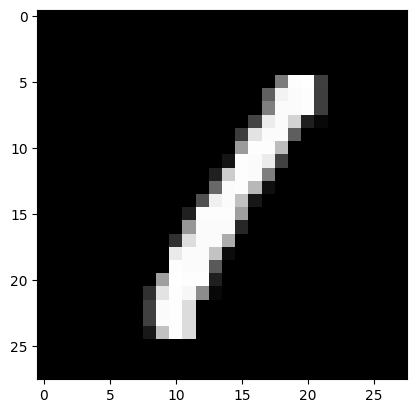

In [ ]:
plt.imshow(x_train[3],cmap='gray')

In [ ]:
def RBF(x, c, s):
  return (np.exp(-np.sum((x - c)**2)/2*(s**2)))

In [ ]:
newX_train = []
newX_test = []

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
for img in range(x_train.shape[0]):
  # print(i)
  image = x_train[img]
  mean = np.mean(image)
  # print(mean)
  newImg = np.zeros((32, 32))
  for i in range(32):
    for j in range(32):
      x, y = i%28 , j%28

      newImg[i][j] = RBF(image[x, y], mean, 1)
  newX_train.append(newImg)

In [ ]:
x_train = np.array(newX_train)

In [ ]:
x_train.shape

(60000, 32, 32)

In [ ]:

for img in range(x_test.shape[0]):
  # print(i)
  image = x_test[img]
  mean = np.mean(image)
  # print(mean)
  newImg = np.zeros((32, 32))
  for i in range(32):
    for j in range(32):
      x, y = i%28 , j%28

      newImg[i][j] = RBF(image[x, y], mean, 1)
  newX_test.append(newImg)

In [ ]:
x_test = np.array(newX_test)

In [ ]:
rbfmodel = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32*32, activation=tf.nn.relu),
      # ''' Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(1400, activation=tf.math.sigmoid),
      # tf.keras.layers.Dense(128, activation= '''TODO'''),

      # ''' Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      #  Dense layer to output classification probabilities

  ])
rbfmodel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20

history = rbfmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2912 - accuracy: 0.1366
Epoch 2/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2872 - accuracy: 0.1391
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2823 - accuracy: 0.1461
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2774 - accuracy: 0.1451
Epoch 5/20
938/938 [==============================] - 30s 31ms/step - loss: 2.2708 - accuracy: 0.1490
Epoch 6/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2661 - accuracy: 0.1525
Epoch 7/20
938/938 [==============================] - 29s 31ms/step - loss: 2.2605 - accuracy: 0.1543
Epoch 8/20
938/938 [==============================] - 30s 32ms/step - loss: 2.2543 - accuracy: 0.1598
Epoch 9/20
938/938 [==============================] - 30s 32ms/step - loss: 2.2478 - accuracy: 0.1628
Epoch 10/20
938/938 [==============================] - 30s 32ms/step - loss: 2.238

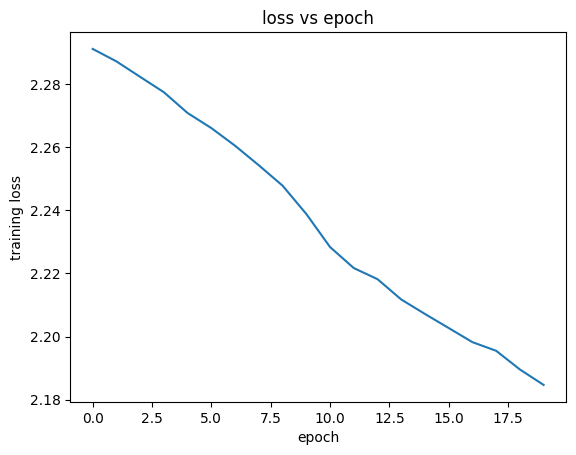

In [ ]:
plt.plot(history.history['loss'])
plt.title("loss vs epoch")
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("Performance")

In [ ]:
print("evaluation accuracy")
eval = rbfmodel.evaluate(x = x_test, y = y_test, batch_size = 1)

evaluation accuracy
10000/10000 [==============================] - 31s 3ms/step - loss: 2.2298 - accuracy: 0.1596


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Make predictions on the test data
y_pred = rbfmodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred_classes, average=None)
recall = recall_score(y_test, y_pred_classes, average=None)
f1 = f1_score(y_test, y_pred_classes, average=None)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Print precision, recall, and F1-score for each class
for i in range(10):
    print(f'Class {i}: Precision={precision[i]}, Recall={recall[i]}, F1-Score={f1[i]}')


313/313 [==============================] - 3s 8ms/step
Accuracy: 0.1596
Confusion Matrix:
[[396  22   0   0  40  22   2 455  38   5]
 [147 166   0   0   4  22   0 738  58   0]
 [382  40   0   0  28  39  21 479  37   6]
 [360  28   0   0  35  35   9 490  40  13]
 [222  28   0   0  67  36   9 567  35  18]
 [262  35   0   0  43  42   7 455  39   9]
 [316  24   1   0  45  41  44 452  27   8]
 [105  18   0   0  31  21   2 808  27  16]
 [232  42   0   0  56  59   5 514  57   9]
 [118  29   0   0  54  26   1 717  48  16]]
Class 0: Precision=0.15590551181102363, Recall=0.40408163265306124, F1-Score=0.225
Class 1: Precision=0.38425925925925924, Recall=0.14625550660792952, F1-Score=0.211869814932993
Class 2: Precision=0.0, Recall=0.0, F1-Score=0.0
Class 3: Precision=0.0, Recall=0.0, F1-Score=0.0
Class 4: Precision=0.1662531017369727, Recall=0.06822810590631365, F1-Score=0.09675090252707581
Class 5: Precision=0.12244897959183673, Recall=0.04708520179372197, F1-Score=0.0680161943319838
Class 6: Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
